# **Waze Project**
**Simplify complex data relationships**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

You check your inbox and discover a new email from Ursula Sayo, Waze's Operations Manager. Ursula asks your team about the details of the regression model. You also notice two follow-up emails from your supervisor, May Santner. The first email is a response to Ursula, and says that the team will build a binomial logistic regression model. In her second email, May asks you to help build the model and prepare an executive summary to share your results.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Regression modeling**

We will build a binomial logistic regression model. Logistic regression will help us estimate the probability of an outcome. This is a useful model because it allows us to consider more than one variable against the variable we're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and Evaluation

**Part 3:** Interpreting Model Results

<br/>

# **Build a regression model**

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:

# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


Import the dataset.

In [2]:
# Load the dataset by running this cell

df = pd.read_csv('waze_dataset.csv')

Before building a logistic regressio model, EDA is an important step to ensure data and model quality because, among other reasons:
* Outliers can significantly bias the results of a logistic regression model, so they will be addressed by data cleaning practices (removing rows, substituting extreme data with average values, and others)
* Missing data will receive a similar treatement as described above
* It may be needed or convenient to transform variables by normalizing, taking ratios, or isolating.

### **Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`.

In [4]:
print(df.shape)
print()
print(df.info())

(14999, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None


**Question:** Are there any missing values in your data?

Yes, the label field has 700 missing values.

Use `.head()`.



In [5]:
df.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [7]:
df = df.drop('ID', axis=1)

Now, check the class balance of the dependent (target) variable, `label`.

In [9]:
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

Call `.describe()` on the data.


In [10]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

The, the following fields seem to have outliers due to the fact of having maximum values many standard deviations from the mean and the 75th quartile:
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

### **Task 2b. Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

We know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [13]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. We can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [14]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [17]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives']>60) & (df['driving_days']>15), 1, 0)

Perform a quick inspection of the new variable.

1. Check the count of professional drivers and non-professionals

2. Within each class (professional and non-professional) calculate the churn rate

In [25]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12652
1     2347
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.802556
                     churned     0.197444
1                    retained    0.930222
                     churned     0.069778
Name: label, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.


## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### **Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Because we know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [29]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

#### **Impute outliers**

We rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

Previously, it was determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

For this analysis, let´s impute the outlying values for these columns. Calculate the **95th percentile** of each column and change to this value any value in the column that exceeds it.


In [30]:
# Impute outliers
#list of columns
cols = ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']

#replace extreme values (bigger than limit calculated by 95th quantile) by threshold
for col in cols:
    lim = df[col].quantile(0.95)
    df.loc[df[col]>lim, col] = lim

Call `describe()`.

In [31]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.157354
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.364147
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label_bin` as to not overwrite the original `label` variable.

In [33]:
# Create binary `label_bin` column
df['label_bin'] = np.where(df['label']=='churned',1,0)

#check if worked
df[['label', 'label_bin']].tail()

,label,label_bin
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


### **Task 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, we will assume that observations are independent given that refer to different (and presumably independent) users.

The second assumption has already been addressed and the last assumption will be verified after modeling.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [36]:
# Generate a correlation matrix
corr_matrix = df.corr(method='pearson')

Now, plot a correlation heatmap.

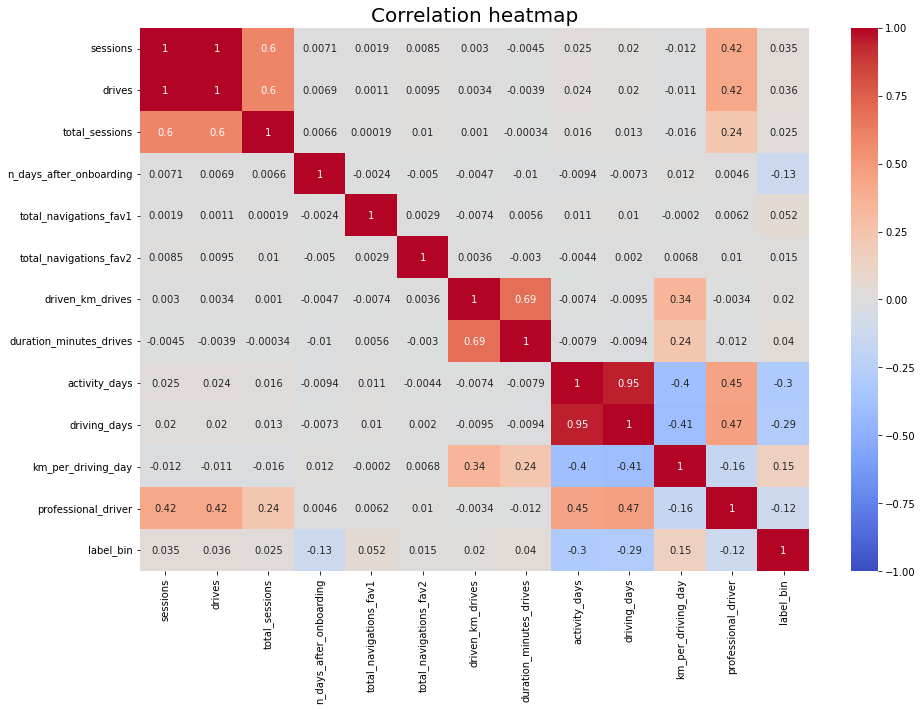

In [41]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap',
          fontsize=20)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold.

**Question:** Which variables are multicollinear with each other?

The following variables have a very strong multicollinearity:
> * *`driving_days` and `activity_days`: 0.95*
<br>
> * *`sessions` and `drives`: 1.0*

### **Task 3c. Create dummies (if necessary)**

In cases with many categorical variables, we can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for the model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. We can just implement the transformation directly.

Create a new, binary column called `device_bin` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [47]:
# Create new `device_bin` variable
df['device_bin'] = np.where(df['device'] == 'iPhone',1,0)

#check
df[['device', 'device_bin']].tail()

,device,device_bin
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### **Task 3d. Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables we want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [49]:
#list of variables to drop
cols = ['label', 'label_bin', 'device', 'sessions', 'driving_days']

# Isolate predictor variables
x = df.drop(columns=cols)

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [50]:
# Isolate target variable
y = df['label_bin']

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [51]:
# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [53]:
# Use .head()
x_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device_bin
152,108,186.192746,3116,243,124,8898.716275,4668.180092,24,612.305861,0,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,455.439492,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since the predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [54]:
model = LogisticRegression(penalty='none', max_iter=400)

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

Create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [56]:
pd.Series(model.coef_[0], index=x.columns)

drives                     0.001912
total_sessions             0.000328
n_days_after_onboarding   -0.000406
total_navigations_fav1     0.001232
total_navigations_fav2     0.000931
driven_km_drives          -0.000015
duration_minutes_drives    0.000109
activity_days             -0.106035
km_per_driving_day         0.000018
professional_driver       -0.001467
device_bin                -0.001040
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [58]:
model.intercept_

array([-0.00170827])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [60]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(x_train)
training_probabilities

array([[0.93955968, 0.06044032],
       [0.61967469, 0.38032531],
       [0.76462858, 0.23537142],
       ...,
       [0.91910102, 0.08089898],
       [0.8509314 , 0.1490686 ],
       [0.93516472, 0.06483528]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [62]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = x_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[0]/prob[1]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

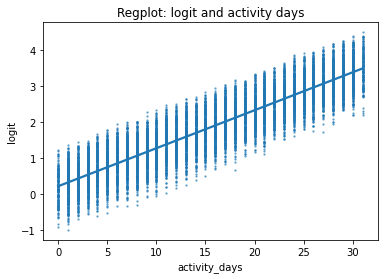

In [65]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Regplot: logit and activity days');

### **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [67]:
# Generate predictions on X_test
y_pd = model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

In [72]:
# Score the model (accuracy) on the test data
print(f"Accuracy: {model.score(x_train, y_train)}")

Accuracy: 0.8259977620290936


### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [74]:
conf_m = confusion_matrix(y_test, y_pd)

Next, use the `ConfusionMatrixDisplay()` function to display the confusion matrix from the above cell, passing the confusion matrix you just created as its argument.

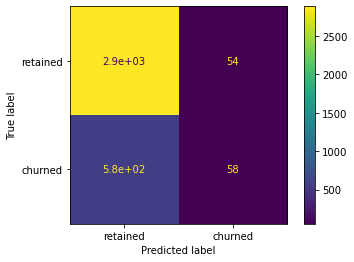

In [77]:
fig = ConfusionMatrixDisplay(
    confusion_matrix=conf_m,
    display_labels=['retained', 'churned']
)
fig.plot()

Use the confusion matrix to compute precision and recall manually.

In [78]:
# Calculate precision manually
precision = conf_m[1,1]/(conf_m[1,0]+conf_m[1,1] )

In [79]:
# Calculate recall manually
precision = conf_m[1,1] / (conf_m[1,0]+conf_m[1,1])

In [82]:
# Create a classification report
print(classification_report(y_test, y_pd, target_names=['retained', 'churned']))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **Extra analysis**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [87]:
# Create a list of (column_name, coefficient) tuples
features = list(zip(x.columns, model.coef_[0]))

# Sort the list by coefficient value
features = sorted(features, key=lambda x: x[1], reverse=True)
features

[('drives', 0.0019124210573071264),
 ('total_navigations_fav1', 0.0012316990797223175),
 ('total_navigations_fav2', 0.0009307855628409623),
 ('total_sessions', 0.0003278741209580164),
 ('duration_minutes_drives', 0.00010911879116653873),
 ('km_per_driving_day', 1.8239937891408254e-05),
 ('driven_km_drives', -1.4880543364301715e-05),
 ('n_days_after_onboarding', -0.00040648964467986825),
 ('device_bin', -0.0010404745290102575),
 ('professional_driver', -0.001467359580648399),
 ('activity_days', -0.10603461417333908)]

Text(0.5, 1.0, 'Features')

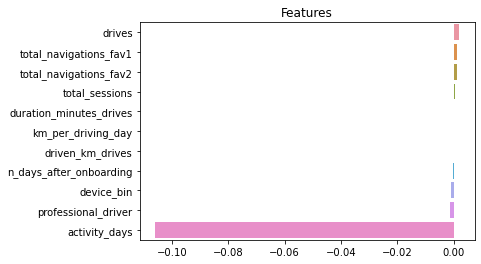

In [90]:
# Plot the feature importances
sns.barplot(
    x=[v[1] for v in features],
    y=[v[0] for v in features],
    orient='h'
)
plt.title('Features')

### **Task 4c. Conclusion**

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?
> activity_days influenced the most, having a negative correlation with user churn. That was not surprising becasue it is known, from previous data analysis, that this variable is correled with driving_days, which also has a negative correlation with churn.

2. Were there any variables expected to be stronger predictors than they were?
> Yes. In prior analysis, km_per_driving_day seemed to have a strong correlation with user churn, including in the presented heat map. However, in the logistic regression model it is not a very relevant independent variable.

3. Why might a variable thought to be important not be important in the model?
> This can be explained by the increase in complexity of the model. When more independent variables are introduced and more factors in the analyzed situation are inserted into the model, the relative relevance that a variable had in simnpler models might be displaced as the explanatory feature of the regression might now capture others relations that are not due to the variable initially in consideration. 

4. Would it be recommended that Waze use this model? Why or why not?
> For relevant business decisions, I would not reccommend the model due to its weak prediction power. It can have more value, however, for further efforts of data analysis.

5. What could be done to improve this model?
> In order to improve this model, it could be possible to try:
    * Creating new features to the model (similar to what was done with the professional_driver field
    * Create models with different combinations of independent variables
    * Build more sofisticated models based on logistic regression

6. What additional features would be recommended to have in order to help improve the model?
> To improve the model, more data could be collected. For instance:
    * Demographic informatio from users, if available
    * More granular data on how users interact with different app features
